# Assignment 1 : Uber ride price prediction



# Step 1 : Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
u_df = df.drop(['Unnamed: 0','key'], axis=1)

In [7]:
u_df.shape

(200000, 7)

In [8]:
u_df['month'] = u_df['pickup_datetime']
u_df.head()
u_df.month = u_df.month.str.slice(start=5, stop=7)
u_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08


In [9]:
u_df['hour'] = u_df['pickup_datetime']
u_df.hour = u_df.hour.str.slice(start=11, stop=13)
u_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [10]:
u_df.drop('pickup_datetime', axis=1, inplace=True)
u_df.shape

(200000, 8)

In [11]:
u_df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
month                0
hour                 0
dtype: int64

In [12]:
u_df.dropna(inplace=True)

In [13]:
u_df.shape

(199999, 8)

In [14]:
u_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'month',
       'hour'],
      dtype='object')

In [15]:
u_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17


# Step 2 : Outlier Detection

In [16]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[-52.  -52.  -50.5 ... 275.  350.  499. ]
17166


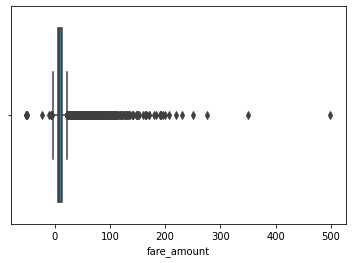

In [17]:
#Outliers for Fare Amount
fare_amt_outliers = boxplot_stats(u_df.fare_amount)[0]['fliers']
fare_amt_outliers.sort()
sns.boxplot(u_df['fare_amount'])
print(fare_amt_outliers)
print(len(fare_amt_outliers))

In [18]:
#remove outliers for fare amount
Q1 = u_df['fare_amount'].quantile(0.25)
Q3 = u_df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1  
filter = (u_df['fare_amount'] >= Q1 - 1.5 * IQR) & (u_df['fare_amount'] <= Q3 + 1.5 *IQR)
cln_df = u_df.loc[filter]

In [19]:
cln_df.shape

(182833, 8)

In [20]:
#Outliers for latitudes and longitudes
#Any value out of [-90, 90] and [-180,180] will be invalid
def find_latitude_outliers(series):
    ans = []
    for i in series:
        if(i<-90 or i>90):
            ans.append(i)
    return ans

def find_longitude_outliers(series):
    ans = []
    for i in series:
        if(i<-180 or i>180):
            ans.append(i)
    return ans


pickup_longitude_outliers = find_longitude_outliers(cln_df['pickup_longitude'])
pickup_latitude_outliers = find_latitude_outliers(cln_df['pickup_latitude'])
dropoff_longitude_outliers = find_longitude_outliers(cln_df['dropoff_longitude'])
dropoff_latitude_outliers = find_latitude_outliers(cln_df['dropoff_latitude'])

print(len(pickup_longitude_outliers))
print(len(pickup_latitude_outliers))
print(len(dropoff_longitude_outliers))
print(len(dropoff_latitude_outliers))

6
4
3
3


[  4   4   4 ...   6   6 208]
22557


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(199998, 8)

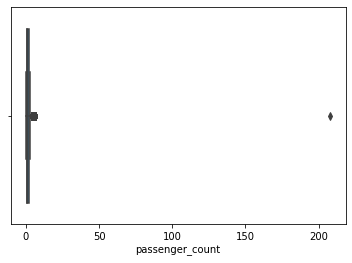

In [21]:
#Outliers for Passenger count 
passenger_count_outliers = boxplot_stats(u_df.passenger_count)[0]['fliers']
passenger_count_outliers.sort()
sns.boxplot(u_df['passenger_count'])
print(passenger_count_outliers)
print(len(passenger_count_outliers))

filter = u_df['passenger_count']<=6
u_df = u_df.loc[filter]
u_df.shape

In [22]:
correlation_matrix = u_df.corr()

In [23]:
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010745
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000343
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001738
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000120
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000796
passenger_count,0.010745,-0.000343,-0.001738,0.000120,-0.000796,1.000000


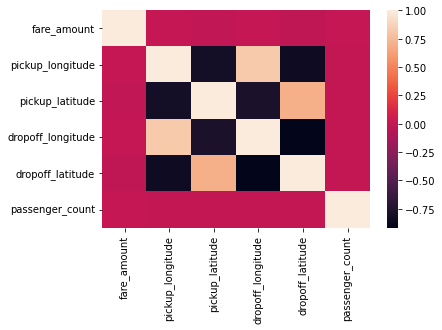

In [24]:
sns.heatmap(correlation_matrix)

In [25]:
convert_dict = {'month': int, 'hour':int}
u_df = u_df.astype(convert_dict)

In [26]:
correlation_matrix = u_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010745,0.023812,-0.021462
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000343,-0.004664,0.002431
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001738,0.004624,-0.003821
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000120,-0.003605,0.003477
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000796,0.003817,-0.002544
passenger_count,0.010745,-0.000343,-0.001738,0.000120,-0.000796,1.000000,0.009053,0.014649
month,0.023812,-0.004664,0.004624,-0.003605,0.003817,0.009053,1.000000,-0.003917
hour,-0.021462,0.002431,-0.003821,0.003477,-0.002544,0.014649,-0.003917,1.000000


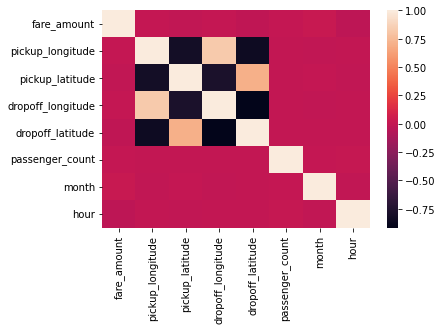

In [27]:
sns.heatmap(correlation_matrix)

# Step 3 : Split Dset

In [28]:
X = u_df.iloc[:, 1:]
y = u_df.iloc[:, 0]
print(X.shape, y.shape)

(199998, 7) (199998,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(169998, 7) (169998,) (30000, 7) (30000,)


# Step 4 : Training and Testing

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [31]:
reg.score(X_test, y_test)

0.001143308423889433

# Step 5 : Distance

In [32]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [33]:
u_df['distance']= haversine(u_df['pickup_longitude'],u_df['dropoff_longitude'],u_df['pickup_latitude'],u_df['dropoff_latitude'])

In [34]:
cln_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [35]:
correlation_matrix = u_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010745,0.023812,-0.021462,0.024684
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000343,-0.004664,0.002431,0.105581
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001738,0.004624,-0.003821,-0.062436
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000120,-0.003605,0.003477,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000796,0.003817,-0.002544,-0.079944
passenger_count,0.010745,-0.000343,-0.001738,0.000120,-0.000796,1.000000,0.009053,0.014649,-0.001518
month,0.023812,-0.004664,0.004624,-0.003605,0.003817,0.009053,1.000000,-0.003917,-0.000632
hour,-0.021462,0.002431,-0.003821,0.003477,-0.002544,0.014649,-0.003917,1.000000,-0.000638
distance,0.024684,0.105581,-0.062436,0.056717,-0.079944,-0.001518,-0.000632,-0.000638,1.000000


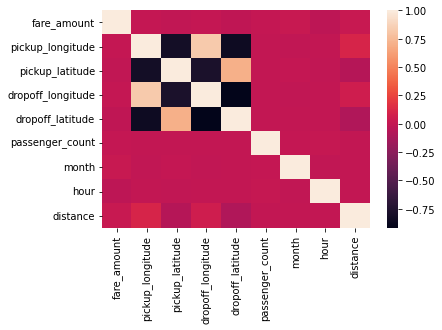

In [36]:
sns.heatmap(correlation_matrix)

Text(0, 0.5, 'fare_amount')

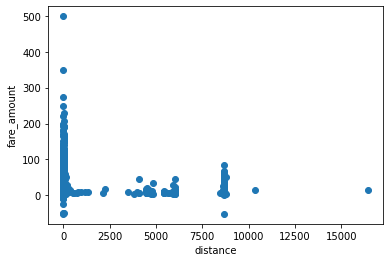

In [37]:
import matplotlib.pyplot as plt
plt.scatter(u_df['distance'], u_df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[7.86514622e+00 7.86525018e+00 7.86563828e+00 ... 8.78289861e+03
 1.03215077e+04 1.64092391e+04]
16755


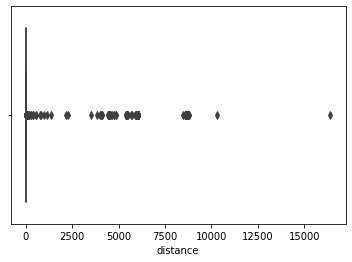

In [38]:
#Outliers for Distance 
distance_outliers = boxplot_stats(u_df.distance)[0]['fliers']
distance_outliers.sort()
sns.boxplot(u_df['distance'])
print(distance_outliers)
print(len(distance_outliers))

In [39]:
filter = (u_df['distance']<=50) & (u_df['distance']>0)
u_df = u_df.loc[filter]
u_df.shape

(193869, 9)

Text(0, 0.5, 'fare_amount')

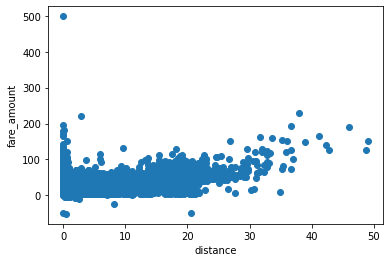

In [40]:
plt.scatter(u_df['distance'], u_df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [41]:
correlation_matrix = u_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
fare_amount,1.000000,0.011765,-0.008399,0.010305,-0.008422,0.012871,0.024284,-0.020924,0.868087
pickup_longitude,0.011765,1.000000,-0.949096,0.999884,-0.993972,0.009754,-0.007485,0.001843,0.005356
pickup_latitude,-0.008399,-0.949096,1.000000,-0.949093,0.954760,-0.009814,0.007592,-0.001821,0.003199
dropoff_longitude,0.010305,0.999884,-0.949093,1.000000,-0.993959,0.009746,-0.007441,0.000945,0.004441
dropoff_latitude,-0.008422,-0.993972,0.954760,-0.993959,1.000000,-0.009865,0.007969,-0.001018,-0.002170
passenger_count,0.012871,0.009754,-0.009814,0.009746,-0.009865,1.000000,0.009229,0.014889,0.009118
month,0.024284,-0.007485,0.007592,-0.007441,0.007969,0.009229,1.000000,-0.004189,0.012044
hour,-0.020924,0.001843,-0.001821,0.000945,-0.001018,0.014889,-0.004189,1.000000,-0.032255
distance,0.868087,0.005356,0.003199,0.004441,-0.002170,0.009118,0.012044,-0.032255,1.000000


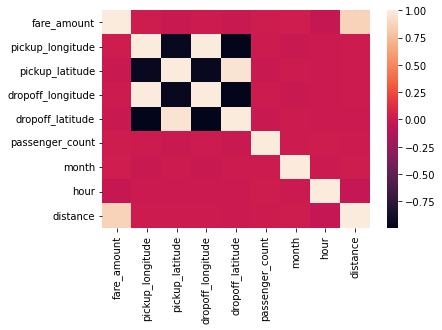

In [42]:
sns.heatmap(correlation_matrix)

# Step 6 : Splitting and Training again

In [43]:
X = u_df.iloc[:, 1:]
y = u_df.iloc[:, 0]
print(X.shape, y.shape)

(193869, 8) (193869,)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(164788, 8) (164788,) (29081, 8) (29081,)


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [46]:
reg.score(X_test, y_test)

0.7746788382772513

## Good performance.